### Set working directory

In [1]:
import os 
print("starting directory: ", os.getcwd())
os.chdir("/w/halld-scshelf2101/home/dbarton/gluex/analysis")
print("changed directory to: ", os.getcwd())

starting directory:  /w/halld-scshelf2101/home/dbarton/gluex/analysis
changed directory to:  /w/halld-scshelf2101/home/dbarton/gluex/analysis


### RUN THIS FIRST: Create DataFrame, list branches

In [2]:
import ROOT
from ROOT import RDataFrame

fileName = '/work/halld/home/dbarton/gluex/dselectors/pi0kplamb_flat_2018_08.root'
treeName = 'pi0kplamb_flat'

def buildDataFrame(fileName, treeName):
    df = ROOT.RDataFrame(treeName, fileName)

    df = df.Define('kpPi0Pim_m', 'kp_m + decayingPi0_m + pim_m') \
           .Define('kpPi0_m', 'kp_m + decayingPi0_m')
    
    return df

dfpi0kplamb = buildDataFrame(fileName, treeName)

# List branches
def list_trees_and_branches(filename):
    file = ROOT.TFile.Open(filename)
    # Loop over all keys in the file
    for key in file.GetListOfKeys():
        obj = key.ReadObj()
        # Check if the object is a tree
        if isinstance(obj, ROOT.TTree):
            tree = obj
            print(f"File: {filename}")
            print(f"Tree: {tree.GetName()}")
            print("Branches:")
            # List all branches in the tree
            branches = tree.GetListOfBranches()
            for branch in branches:
                print(f" - {branch.GetName()}")

    # Close the file
    file.Close()
list_trees_and_branches(fileName)


Welcome to JupyROOT 6.24/04
File: /work/halld/home/dbarton/gluex/dselectors/pi0kplamb_flat_2018_08.root
Tree: pi0kplamb_flat
Branches:
 - beam_e
 - beam_e_measured
 - kp_m
 - kp_m_measured
 - kp_m2
 - kp_m2_measured
 - decayingPi0_m
 - decayingPi0_m2
 - photon1_E
 - photon1_E_measured
 - photon1_p
 - photon1_p_measured
 - photon2_E
 - photon2_E_measured
 - photon2_p
 - photon2_p_measured
 - decayingLambda_m
 - decayingLambda_m_measured
 - decayingLambda_m2
 - decayingLambda_m2_measured
 - decayingLambda_E
 - decayingLambda_E_measured
 - pim_m
 - pim_m_measured
 - pim_m2
 - pim_m2_measured
 - protonRecoil_m
 - protonRecoil_m_measured
 - protonRecoil_m2
 - protonRecoil_m2_measured
 - kpANDPi0_m
 - kpANDPi0_E
 - kpANDphoton1_E
 - kpANDphoton1_E_measured
 - kpANDphoton2_E
 - kpANDphoton2_E_measured
 - kpANDlambda_m
 - kpANDlambda_m_measured
 - kpANDlambda_E
 - kpANDproton_m
 - kpANDproton_m_measured
 - kpANDpim_m
 - kpANDpim_m_measured
 - pi0ANDlambda_m
 - pi0ANDproton_m
 - pi0ANDpim_m
 - 

### Define cuts

<p style="text-align: center;">
<u style="font-size:12px;">_____________</u><br>
<u style="font-size:18px;">_____________________</u><br>
<u style="font-size:24px;">___________________________</u>
</p>

<h2 style="text-align: center;">PLOTS</h2>

<p style="text-align: center;">
<u style="font-size:24px;">___________________________</u><br>
<u style="font-size:18px;">_____________________</u><br>
<u style="font-size:12px;">_____________</u>
</p>

### Beam Energy

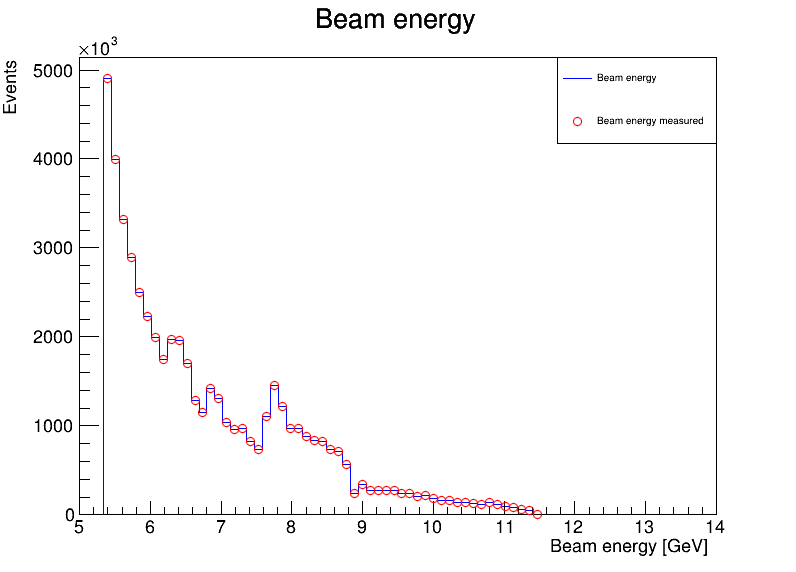

Info in <TCanvas::Print>: png file ../_plots/pi0kplamb_beam_e.png has been created


In [10]:
from IPython.display import Image, display

plotTitle = 'Beam energy'
plot2Title = 'Beam energy measured'
axisLabel = 'Beam energy [GeV]'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    
    h1 = dfFiltered.Histo1D(('beam_e', plotTitle, 80, 5.0, 14.0), 'beam_e')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()

    h2 = dfFiltered.Histo1D(('beam_p', plot2Title, 80, 5.0, 14.0), 'beam_e_measured')
    h2.SetStats(False)
    h2.SetMarkerStyle(24)
    h2.SetMarkerColor(ROOT.kRed)
    h2.GetXaxis().SetTitle(axisLabel)
    h2.GetYaxis().SetTitle('Events')
    h2.Draw('p same')
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.75)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.AddEntry(h2.GetValue(), plot2Title, 'p')
    legend1.Draw('same')

    img_path = '../_plots/pi0kplamb_beam_e.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### Target proton

In [ ]:
# from IPython.display import Image, display

# plotTitle = 'Target proton mass'
# axisLabel = 'Mass (target proton) [GeV/c^{2}]'

# def plot_hist(df):

#     dfFiltered = df

#     canvas = ROOT.TCanvas("c", "c", 800, 600)
#     h1 = dfFiltered.Histo1D(("h1", plotTitle, 60, 0, 3), '??????')
#     h1.SetStats(False)
#     h1.SetLineColor(ROOT.kBlue)
#     h1.GetXaxis().SetTitle(axisLabel)
#     h1.GetYaxis().SetTitle('Events')
#     h1.Draw()
#     legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
#     legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
#     legend1.Draw('same')

#     img_path = '../_plots/pi0kplamb_target_m.png'
#     canvas.SaveAs(img_path)
#     canvas.Close()
#     display(Image(filename=img_path))

# plot_hist(dfpi0kplamb)

### $K^{+}$ $\pi^{0}$ $\pi^{-}$

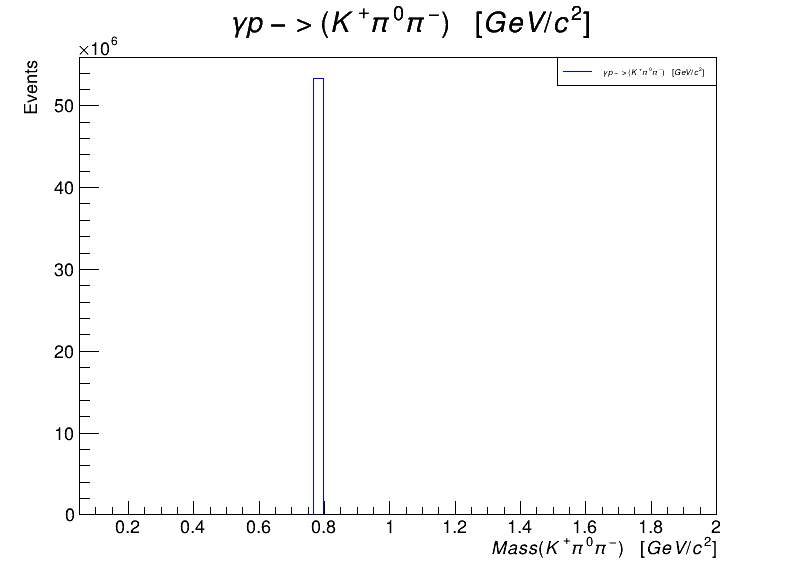

Info in <TCanvas::Print>: png file ../_plots/pi0kplamb_kpPi0Pim_m.png has been created


In [3]:
from IPython.display import Image, display

plotTitle = '$\gamma p -> (K^{+} \pi^{0} \pi^{-})$ [GeV/c^{2}]'
axisLabel = '$Mass (K^{+} \pi^{0} \pi^{-})$ [GeV/c^{2}]'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    h1 = dfFiltered.Histo1D(('h1', plotTitle, 60, 0.05, 2.0), 'kpPi0Pim_m')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.Draw('same')

    img_path = '../_plots/pi0kplamb_kpPi0Pim_m.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### $K^{+} \pi^{0}$ (can be $K^{*}$)

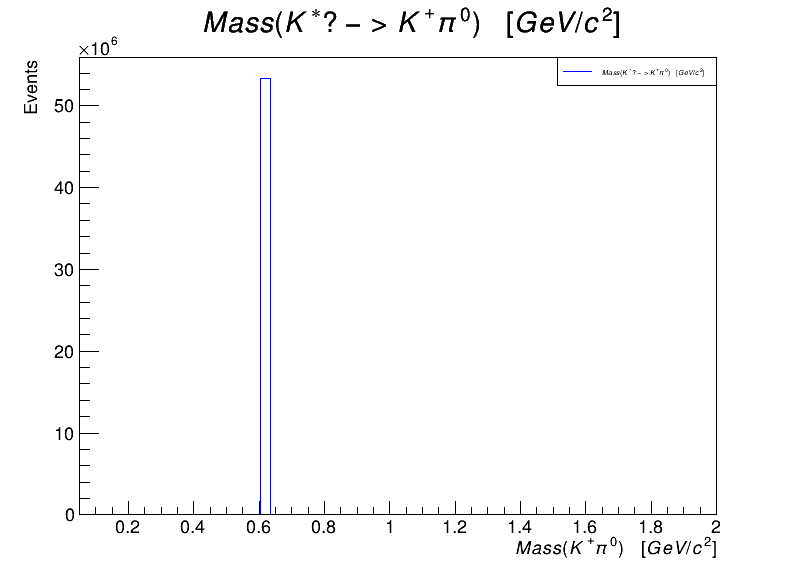

Info in <TCanvas::Print>: png file ../_plots/pi0kplamb_kpPi0_m.png has been created


In [4]:
from IPython.display import Image, display
import matplotlib.pyplot as plt

plotTitle = '$Mass (K^{*}? -> K^{+} \pi^{0})$ [GeV/c^{2}]'
axisLabel = '$Mass (K^{+} \pi^{0})$ [GeV/c^{2}]'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    h1 = dfFiltered.Histo1D(('h1', plotTitle, 60, 0.05, 2.0), 'kpPi0_m')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.Draw('same')

    img_path = '../_plots/pi0kplamb_kpPi0_m.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### $K^{+}$ mass

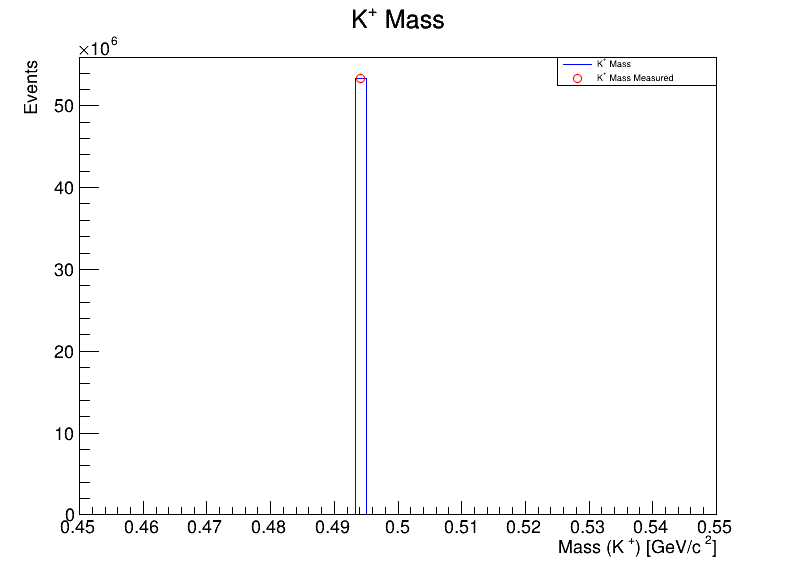

Info in <TCanvas::Print>: png file ../_plots/pi0kplamb_kp_m.png has been created


In [5]:
from IPython.display import Image, display

plotTitle = 'K^{+} Mass'
plot2Title = 'K^{+} Mass Measured'
axisLabel = 'Mass (K^{+}) [GeV/c^{2}]'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    h1 = dfFiltered.Histo1D(('h1', plotTitle, 60, 0.45, 0.55), 'kp_m')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()

    h2 = dfFiltered.Histo1D(('h2', plot2Title, 60, 0.45, 0.55), 'kp_m_measured')
    h2.SetStats(False)
    h2.SetMarkerStyle(24)
    h2.SetMarkerColor(ROOT.kRed)
    # h2.GetXaxis().SetTitle(axisLabel)
    # h2.GetYaxis().SetTitle('Events')
    h2.Draw('p same')

    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.AddEntry(h2.GetValue(), plot2Title, 'p')
    legend1.Draw('same')

    img_path = '../_plots/pi0kplamb_kp_m.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### $\pi_{0}$ mass

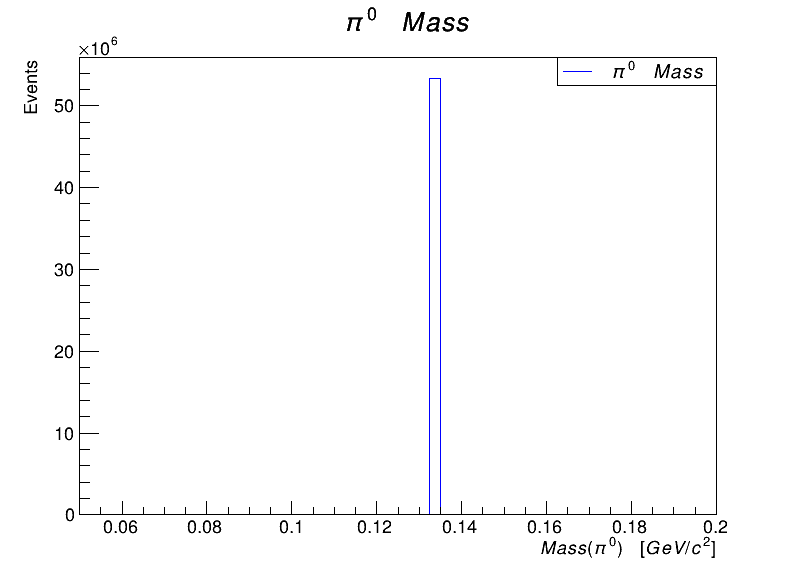

Info in <TCanvas::Print>: png file ../_plots/pi0kplamb_pi0_m.png has been created


In [6]:
from IPython.display import Image, display

plotTitle = '$\pi^{0}$ Mass'
axisLabel = '$Mass (\pi^{0})$ [GeV/c^{2}]'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    h1 = dfFiltered.Histo1D(('h1', plotTitle, 60, 0.05, 0.2), 'decayingPi0_m')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.Draw('same')

    img_path = '../_plots/pi0kplamb_pi0_m.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### $\Lambda$ mass

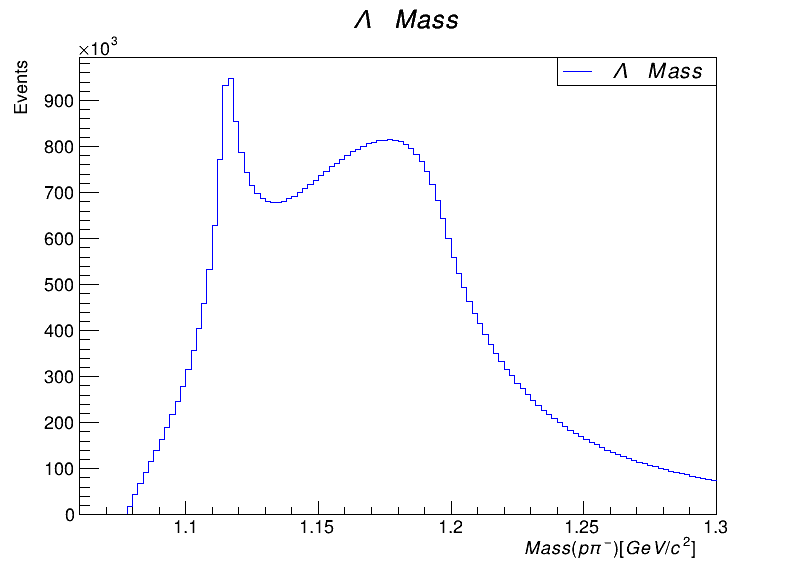

Info in <TCanvas::Print>: png file ../_plots/pi0kplamb_lambda_m.png has been created


In [7]:
from IPython.display import Image, display

plotTitle = '$\Lambda$ Mass'
axisLabel = '$Mass (p \pi^{-}) [GeV/c^{2}]$'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    h1 = dfFiltered.Histo1D(('h1', plotTitle, 120, 1.06, 1.3), 'decayingLambda_m')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.Draw('same')

    img_path = '../_plots/pi0kplamb_lambda_m.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### $\gamma_{1}$ energy

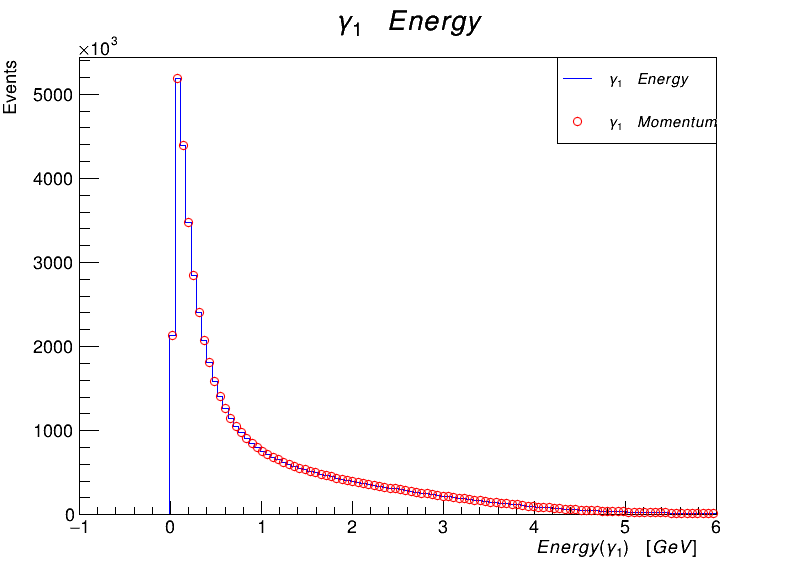

Info in <TCanvas::Print>: png file ../_plots/pi0kplamb_photon1_E.png has been created


In [8]:
from IPython.display import Image, display

plotTitle = '$\gamma_{1}$ Energy'
plot2Title = '$\gamma_{1}$ Momentum'
axisLabel = '$Energy (\gamma_{1}) \ [GeV]$'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    
    h1 = dfFiltered.Histo1D(('photon1_E', plotTitle, 120, -1.0, 6.0), 'photon1_E')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()

    h2 = dfFiltered.Histo1D(('photon1_p', plot2Title, 120, -1.0, 6.0), 'photon1_p')
    h2.SetStats(False)
    h2.SetMarkerStyle(24)
    h2.SetMarkerColor(ROOT.kRed)
    h2.GetXaxis().SetTitle(axisLabel)
    h2.GetYaxis().SetTitle('Events')
    h2.Draw('p same')
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.75)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.AddEntry(h2.GetValue(), plot2Title, 'p')
    legend1.Draw('same')

    img_path = '../_plots/pi0kplamb_photon1_E.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### $\gamma_{2}$ energy

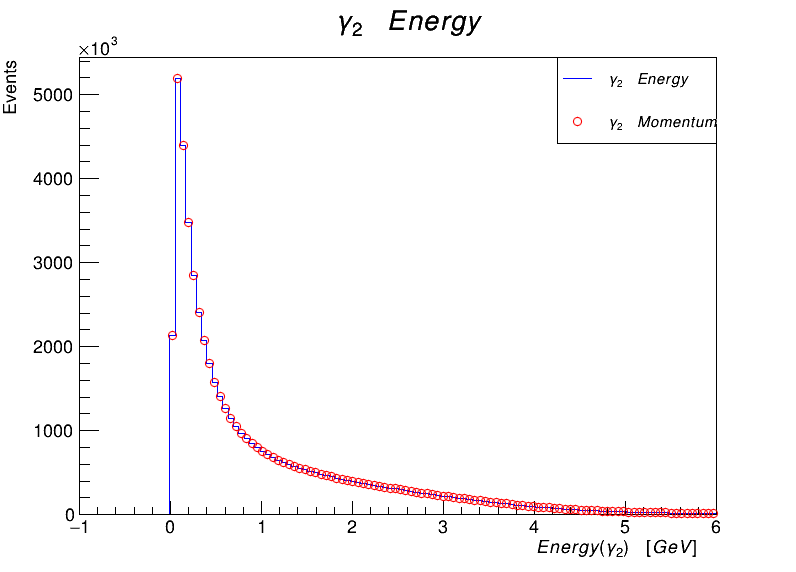

Info in <TCanvas::Print>: png file ../_plots/pi0kplamb_photon1_E.png has been created


In [9]:
from IPython.display import Image, display

plotTitle = '$\gamma_{2}$ Energy'
plot2Title = '$\gamma_{2}$ Momentum'
axisLabel = '$Energy (\gamma_{2}) \ [GeV]$'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    
    h1 = dfFiltered.Histo1D(('photon1_E', plotTitle, 120, -1.0, 6.0), 'photon2_E')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()

    h2 = dfFiltered.Histo1D(('photon1_p', plot2Title, 120, -1.0, 6.0), 'photon2_p')
    h2.SetStats(False)
    h2.SetMarkerStyle(24)
    h2.SetMarkerColor(ROOT.kRed)
    h2.GetXaxis().SetTitle(axisLabel)
    h2.GetYaxis().SetTitle('Events')
    h2.Draw('p same')
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.75)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.AddEntry(h2.GetValue(), plot2Title, 'p')
    legend1.Draw('same')

    img_path = '../_plots/pi0kplamb_photon1_E.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### Recoiling proton Mass

In [ ]:
from IPython.display import Image, display

plotTitle = 'Proton Mass'
axisLabel = 'Mass (proton reoil) [GeV/c^{2}]'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    h1 = dfFiltered.Histo1D(('h1', plotTitle, 120, 0.9, 1.0), 'protonRecoil_m')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.Draw('same')

    img_path = '../_plots/pi0kplamb_protonRecoil_m.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### $\pi_{-}$ mass

In [ ]:
from IPython.display import Image, display

plotTitle = '$\pi^{-}$ Mass'
axisLabel = '$Mass (\pi^{-}) [GeV/c^{2}]$'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    h1 = dfFiltered.Histo1D(('h1', plotTitle, 120, 0.1, 0.18), 'pim_m')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.Draw('same')

    img_path = '../_plots/pi0kplamb_pim_m.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

<p style="text-align: center;">
<u style="font-size:12px;">_____________</u><br>
<u style="font-size:18px;">_____________________</u><br>
<u style="font-size:24px;">___________________________</u>
</p>

<h2 style="text-align: center;">VARIOUS COMBINATIONS</h2>

<p style="text-align: center;">
<u style="font-size:24px;">___________________________</u><br>
<u style="font-size:18px;">_____________________</u><br>
<u style="font-size:12px;">_____________</u>
</p>

### Dalitz plot: ($p_{K^{+}} + p_{\pi^{0}})^{2}$ vs. ($p_{\Lambda} + p_{\pi^{0}})^{2}$

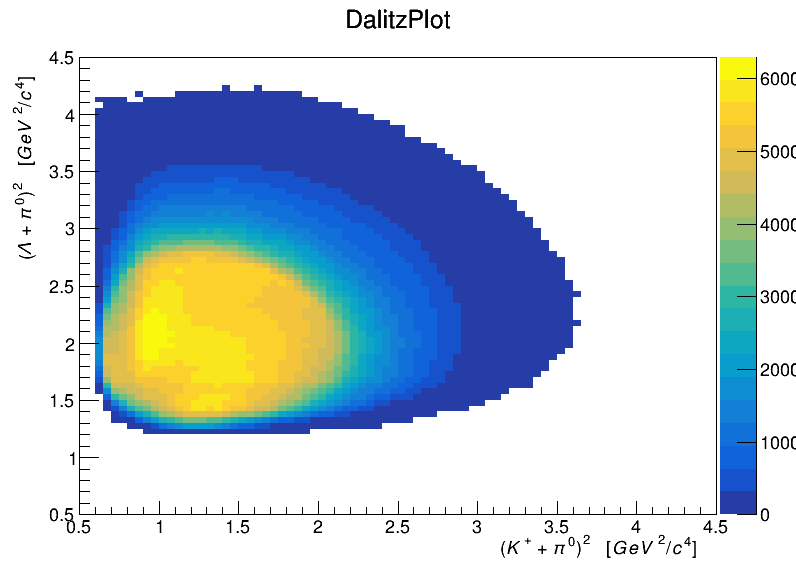

Info in <TCanvas::Print>: png file ../_plots/pi0kplamb_DALITZ_kpPi0VSlambPi0.png has been created


In [11]:
from IPython.display import Image, display

plotTitle = 'Dalitz plot'
XaxisLabel = '$({K^{+}} + {\pi^{0}})^{2} \ [GeV^{2}/c^{4}]$'
YaxisLabel = '$({\Lambda} + {\pi^{0}})^{2} \ [GeV^{2}/c^{4}]$'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = dfFiltered.Histo2D(('DalitzPlot', 'DalitzPlot', 80, 0.5, 4.5, 80, 0.5, 4.5), 'kpANDPi0_m', 'pi0ANDlambda_m')

    h1.SetStats(False)
    h1.GetXaxis().SetTitle(XaxisLabel)
    h1.GetYaxis().SetTitle(YaxisLabel)
    h1.Draw('colz')


    # legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    # legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    # legend1.Draw('same')

    img_path = '../_plots/pi0kplamb_DALITZ_kpPi0VSlambPi0.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### Dalitz plot: ($p_{K^{+}} + p_{\Lambda})$ vs. ($p_{\pi^{0}} + p_{\Lambda})^{2}$

In [ ]:
from IPython.display import Image, display

plotTitle = 'Dalitz plot'
XaxisLabel = '$({K^{+}} + {\Lambda})^{2} \ [GeV^{2}/c^{4}]$'
YaxisLabel = '$({\pi^{0}} + {\Lambda})^{2} \ [GeV^{2}/c^{4}]$'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = dfFiltered.Histo2D(('DalitzPlot', 'DalitzPlot', 80, 1.0, 4.7, 80, 1.0, 4.7), 'kpANDlambda_m', 'pi0ANDlambda_m')

    h1.SetStats(False)
    h1.GetXaxis().SetTitle(XaxisLabel)
    h1.GetYaxis().SetTitle(YaxisLabel)
    h1.Draw('colz')


    # legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    # legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    # legend1.Draw('same')

    img_path = '../_plots/pi0kplamb_DALITZ_kpLambVSPi0Lamb.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)